<font >
<h4 align="center">
Exploratory Data Analysis</h4>
</font>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipyleaflet
import json
import os
import requests
from ipywidgets import link, FloatSlider
from branca.colormap import linear
import seaborn as sns
df=pd.read_csv('database.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
def load_data(url, filename, file_type):
    r = requests.get(url)
    with open(filename, 'w') as f:
        f.write(r.content.decode("utf-8"))
    with open(filename, 'r') as f:
        return file_type(f)

In [48]:
geo_json_data = load_data(
    'https://raw.githubusercontent.com/jupyter-widgets/ipyleaflet/master/examples/us-states.json',
    'us-states.json',
     json.load)

In [49]:
df['delinquency']=df['currentdelinquencystatus'].apply(lambda x: 0 if x < 32 else 1)

In [50]:
df.head()

,Unnamed: 0,assettypenumber,assetnumber,reportingperiodbeginningdate,reportingperiodendingdate,originatorname,originationdate,originalloanamount,originalloanterm,loanmaturitydate,...,demandresolutiondate,repurchasername,repurchasereplacementreasoncode,chargedoffprincipalamount,recoveredamount,modificationtypecode,paymentextendednumber,repossessedindicator,repossessedproceedsamount,delinquency
0,0,CIK number-Sequential asset number,0001724128 - 000001,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,16477.10,73,03/2022,...,NaN,NaN,NaN,0.0,0.0,NaN,0,False,0.0,0
1,1,CIK number-Sequential asset number,0001724128 - 000002,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,25507.47,76,10/2022,...,NaN,NaN,NaN,0.0,0.0,NaN,0,False,0.0,0
2,2,CIK number-Sequential asset number,0001724128 - 000005,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,42746.64,61,03/2021,...,NaN,NaN,NaN,0.0,0.0,NaN,0,False,0.0,0
3,3,CIK number-Sequential asset number,0001724128 - 000008,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,24377.86,74,04/2022,...,NaN,NaN,NaN,0.0,0.0,NaN,0,False,0.0,1
4,4,CIK number-Sequential asset number,0001724128 - 000009,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,49155.07,74,08/2022,...,NaN,NaN,NaN,0.0,0.0,NaN,0,False,0.0,0


In [55]:
df1.head()

0         0
1         0
2         0
3         1
4         0
         ..
232080    0
381426    0
470281    0
501874    0
799315    0
Name: delinquency, Length: 278, dtype: int64

In [78]:
df_=df.groupby('obligorgeographiclocation')['delinquency'].apply(lambda x: (x==1).sum()).reset_index(name='delinquency_count')
df_nondelinquency=df.groupby('obligorgeographiclocation')['delinquency'].apply(lambda x: (x==0).sum()).reset_index(name='nondelinquency_count')
df_['nondelinquency_count']=df_nondelinquency['nondelinquency_count']

In [79]:
df_['delinquency_count'].sum()

23705

In [82]:
df_['rate']=df_['delinquency_count']/(df_['delinquency_count']+df_['nondelinquency_count'])

In [94]:
df_.sort_values(by=['rate'], ascending=False).head(10)

,obligorgeographiclocation,delinquency_count,nondelinquency_count,rate
0,A6,1,2,0.333333
42,PR,5,21,0.192308
13,GU,9,43,0.173077
48,UT,148,3739,0.038076
4,AR,560,14528,0.037116
28,MS,322,9339,0.033330
55,WY,85,2524,0.032580
2,AK,41,1306,0.030438
31,ND,108,3476,0.030134
12,GA,723,23398,0.029974


In [113]:
# sum=1
# sum=df_.loc[df_['obligorgeographiclocation']=='A6'].iloc[0]
# sum
df_[df_['obligorgeographiclocation']=='A6']['delinquency_count'].values[0]

1

In [114]:
Northeast=['ME','NH','VT','NY','RI','MA','PA','NJ','CT']
Midwest=['ND','SD','NE','KS','MO','IA','MN','WI','IL','IN','MI','OH']
South=['DE','MD','DC','WV','VA','KY','NC','TN','SC','GA','FL','AL','MS','AR','LA','OK','TX']
West=['WA','OR','ID','MT','WY','CO','NM','AZ','UT','NV','CA','AK','HI']

In [118]:
def cal_rate(ary):
    delinquency_sum=0
    nondelinquency_sum=0
    for i,ele in enumerate(ary):
        delinquency_sum+=df_[df_['obligorgeographiclocation']==ele]['delinquency_count'].values[0]
        nondelinquency_sum+=df_[df_['obligorgeographiclocation']==ele]['nondelinquency_count'].values[0]
    return (delinquency_sum/(delinquency_sum+nondelinquency_sum))

In [121]:
print("Northeast: "+str(cal_rate(Northeast)))
print("Midwest: "+str(cal_rate(Midwest)))
print("South: "+str(cal_rate(South)))
print("West: "+str(cal_rate(West)))

Northeast: 0.019176644902415337
Midwest: 0.021074071907088317
South: 0.02589937392545496
West: 0.022449995850278032


In [90]:
data=dict(zip(df_['obligorgeographiclocation'].tolist(), df_['delinquency_count'].tolist()))

In [91]:
layer = ipyleaflet.Choropleth(
    geo_data=geo_json_data,
    choro_data=data,
    colormap=linear.YlOrRd_04,
    border_color='black',
    style={'fillOpacity': 0.8, 'dashArray': '5, 5'})

m = ipyleaflet.Map(center = (43,-100), zoom = 4)
m.add_layer(layer)
m

Map(center=[43, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [13]:
lst=df["obligorcreditscore"].values

In [14]:
def func(lst):
    count=0
    sum=0.0
    for i in range(0,len(lst)):
        if lst[i]!='None':
            count+=1
            sum+=float(lst[i])
    return sum/count
print(func(lst))

766.4375252120766


In [15]:
df.dropna (axis=1, how='all', inplace=True)
df.replace ('None', 766.4375252120766, regex=True, inplace=True)
df.drop (columns=['Unnamed: 0', 'assettypenumber', 'primaryloanservicername'], inplace=True)
df.drop(df[df['zerobalancecode'] < 5].index, inplace=True)
#easy way
# ary=[]
# for i in range(0,32):
#     ary.append(i)
# df['delinquency']=np.where(df[['current delinquency status']].isin(ary), 0, 1)
#use lambda 


In [16]:
cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('delinquency')))
df = df.reindex(columns= cols)

In [17]:
df.head()

,delinquency,assetnumber,reportingperiodbeginningdate,reportingperiodendingdate,originatorname,originationdate,originalloanamount,originalloanterm,loanmaturitydate,originalinterestratepercentage,...,zerobalanceeffectivedate,zerobalancecode,currentdelinquencystatus,assetsubjectdemandindicator,chargedoffprincipalamount,recoveredamount,modificationtypecode,paymentextendednumber,repossessedindicator,repossessedproceedsamount
0,0,0001724128 - 000001,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,16477.10,73,03/2022,0.0645,...,NaN,NaN,7.0,False,0.0,0.0,NaN,0,False,0.0
1,0,0001724128 - 000002,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,25507.47,76,10/2022,0.0280,...,NaN,NaN,0.0,False,0.0,0.0,NaN,0,False,0.0
2,0,0001724128 - 000005,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,42746.64,61,03/2021,0.0665,...,NaN,NaN,11.0,False,0.0,0.0,NaN,0,False,0.0
3,1,0001724128 - 000008,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,24377.86,74,04/2022,0.1080,...,NaN,NaN,88.0,False,0.0,0.0,NaN,0,False,0.0
4,0,0001724128 - 000009,07-01-2019,07-31-2019,GM FINANCIAL,11/2015,49155.07,74,08/2022,0.0625,...,NaN,NaN,16.0,False,0.0,0.0,NaN,0,False,0.0


In [18]:
df['zerobalancecode'].value_counts(dropna=False)

NaN    1005174
Name: zerobalancecode, dtype: int64

In [19]:
var_factors = ['interestcalculationtypecode', 'interestcalculationtypecode', 'underwritingindicator', 'paymenttypecode',
               'subvented', 'vehiclenewusedcode', 'vehicletypecode', 'vehiclevaluesourcecode',
               'obligoremploymentverificationcode',
               'obligorincomeverificationlevelcode', 'coobligorindicator', 'obligorgeographiclocation',
               'assetaddedindicator',
               'reportingperiodmodificationindicator', 'servicingadvancemethodcode', 'assetsubjectdemandindicator',
               'repossessedindicator']
# var_num = ['originalloanamount', 'originalloanterm', 'originalinterestratepercentage', 'vehiclevalueamount',
#               'obligorcreditscore',
#               'paymenttoincomepercentage', 'remainingtermtomaturitynumber', 'reportingperiodbeginningloanbalanceamount',
#               'nextreportingperiodpaymentamountdue',
#               'reportingperiodinterestratepercentage', 'nextinterestratepercentage', 'servicingfeepercentage',
#               'servicingflatfeeamount',
#               'otherservicerfeeretainedbyservicer', 'otherassesseduncollectedservicerfeeamount',
#               'scheduledinterestamount', 'scheduledprincipalamount',
#               'otherprincipaladjustmentamount', 'reportingperiodactualendbalanceamount',
#               'reportingperiodscheduledpaymentamount', 'totalactualamountpaid',
#               'actualinterestcollectedamount', 'actualprincipalcollectedamount', 'actualothercollectedamount',
#               'serviceradvancedamount',
#               'chargedoffprincipalamount', 'recoveredamount', 'repossessedproceedsamount']

vs_part1=['originalloanamount', 'originalloanterm', 'originalinterestratepercentage', 'vehiclevalueamount',
              'obligorcreditscore',
              'paymenttoincomepercentage', 'remainingtermtomaturitynumber', 'reportingperiodbeginningloanbalanceamount',
              'nextreportingperiodpaymentamountdue',
              'reportingperiodinterestratepercentage', 'nextinterestratepercentage'
              ]
vs_part2=['scheduledinterestamount', 'scheduledprincipalamount',
               'reportingperiodactualendbalanceamount',
              'reportingperiodscheduledpaymentamount', 'totalactualamountpaid',
              'actualinterestcollectedamount', 'actualprincipalcollectedamount'
             ]
var_num = vs_part1+vs_part2
y_col=['delinquency']
var = var_factors + var_num+y_col
# Get all the column index for independent variables
column_num = [df.columns.get_loc (i) for i in var]
var_drop = list(set(df.columns.values)-set(var))
df = pd.get_dummies(df, columns=var_factors)
df = df.drop (columns=var_drop)

In [20]:
df.head()

,delinquency,originalloanamount,originalloanterm,originalinterestratepercentage,vehiclevalueamount,obligorcreditscore,paymenttoincomepercentage,remainingtermtomaturitynumber,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,...,obligorgeographiclocation_WI,obligorgeographiclocation_WV,obligorgeographiclocation_WY,assetaddedindicator_False,reportingperiodmodificationindicator_False,reportingperiodmodificationindicator_True,servicingadvancemethodcode_1,assetsubjectdemandindicator_False,repossessedindicator_False,repossessedindicator_True
0,0,16477.10,73,0.0645,17767.0,583,0.0364,32,8699.75,542.05,...,0,0,0,1,1,0,1,1,1,0
1,0,25507.47,76,0.0280,21338.0,802,0.0564,39,14328.38,371.12,...,0,0,0,1,1,0,1,1,1,0
2,0,42746.64,61,0.0665,35075.0,774,0.0917,20,16494.95,1680.62,...,0,0,0,1,1,0,1,1,1,0
3,1,24377.86,74,0.1080,18122.0,649,0.1601,33,15259.17,1846.34,...,0,0,0,1,1,0,1,1,1,0
4,0,49155.07,74,0.0625,45843.0,690,0.1209,37,28828.25,1640.60,...,0,0,0,1,1,0,1,1,1,0


In [21]:
df_na = df.loc[:, df.isna().any()]

In [22]:
df_na

,paymenttoincomepercentage,reportingperiodinterestratepercentage
0,0.0364,0.0645
1,0.0564,0.0280
2,0.0917,0.0665
3,0.1601,0.1080
4,0.1209,0.0625
...,...,...
1021628,0.1517,0.0589
1021629,0.0209,0.0624
1021630,0.0355,0.0000
1021631,0.0945,0.0685


In [23]:
df.isnull().sum().sum()

123

In [24]:
from missingpy import MissForest
df_impute = MissForest(copy=False, n_jobs=8).fit_transform(df_na)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


In [25]:
df_impute = pd.DataFrame(df_impute, columns=list(df_na.columns.values))

In [26]:
df.update(df_impute)

In [27]:
df.isna().sum().sum()

2

In [28]:
df=df.dropna()

In [29]:
df.isna().sum().sum()

0

In [30]:
duplicate_columns = df.columns[df.columns.duplicated()]
duplicate_columns

Index(['interestcalculationtypecode_1'], dtype='object')

In [31]:
df = df.loc[:,~df.columns.duplicated()]
df['interestcalculationtypecode_1']

0          1
1          1
2          1
3          1
4          1
          ..
1021628    1
1021629    1
1021630    1
1021631    1
1021632    1
Name: interestcalculationtypecode_1, Length: 1005172, dtype: uint8

In [32]:
df.shape

(1005172, 105)

In [33]:
mask=np.ones(df.shape[0], dtype='int')
mask=(mask==1)

In [34]:
df.head()

,delinquency,originalloanamount,originalloanterm,originalinterestratepercentage,vehiclevalueamount,obligorcreditscore,paymenttoincomepercentage,remainingtermtomaturitynumber,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,...,obligorgeographiclocation_WI,obligorgeographiclocation_WV,obligorgeographiclocation_WY,assetaddedindicator_False,reportingperiodmodificationindicator_False,reportingperiodmodificationindicator_True,servicingadvancemethodcode_1,assetsubjectdemandindicator_False,repossessedindicator_False,repossessedindicator_True
0,0,16477.10,73,0.0645,17767.0,583,0.0364,32,8699.75,542.05,...,0,0,0,1,1,0,1,1,1,0
1,0,25507.47,76,0.0280,21338.0,802,0.0564,39,14328.38,371.12,...,0,0,0,1,1,0,1,1,1,0
2,0,42746.64,61,0.0665,35075.0,774,0.0917,20,16494.95,1680.62,...,0,0,0,1,1,0,1,1,1,0
3,1,24377.86,74,0.1080,18122.0,649,0.1601,33,15259.17,1846.34,...,0,0,0,1,1,0,1,1,1,0
4,0,49155.07,74,0.0625,45843.0,690,0.1209,37,28828.25,1640.60,...,0,0,0,1,1,0,1,1,1,0


In [35]:
df.loc[:,var_num].dtypes

originalloanamount                           float64
originalloanterm                               int64
originalinterestratepercentage               float64
vehiclevalueamount                           float64
obligorcreditscore                            object
paymenttoincomepercentage                    float64
remainingtermtomaturitynumber                  int64
reportingperiodbeginningloanbalanceamount    float64
nextreportingperiodpaymentamountdue          float64
reportingperiodinterestratepercentage        float64
nextinterestratepercentage                   float64
scheduledinterestamount                      float64
scheduledprincipalamount                     float64
reportingperiodactualendbalanceamount        float64
reportingperiodscheduledpaymentamount        float64
totalactualamountpaid                        float64
actualinterestcollectedamount                float64
actualprincipalcollectedamount               float64
dtype: object

In [36]:
len(var_num)

18

In [37]:
from sklearn.preprocessing import StandardScaler
df.loc[:,var_num]=StandardScaler().fit_transform(df.loc[:,var_num])

In [38]:
vs_part1=['originalloanamount', 'originalloanterm', 'originalinterestratepercentage', 'vehiclevalueamount',
              'obligorcreditscore',
              'paymenttoincomepercentage', 'remainingtermtomaturitynumber', 'reportingperiodbeginningloanbalanceamount',
              'nextreportingperiodpaymentamountdue',
              'reportingperiodinterestratepercentage', 'nextinterestratepercentage'
              ]
vs_part2=['scheduledinterestamount', 'scheduledprincipalamount',
               'reportingperiodactualendbalanceamount',
              'reportingperiodscheduledpaymentamount', 'totalactualamountpaid',
              'actualinterestcollectedamount', 'actualprincipalcollectedamount'
             ]
vs_part3=[ 'servicingfeepercentage',
              'servicingflatfeeamount',
              'otherservicerfeeretainedbyservicer', 'otherassesseduncollectedservicerfeeamount','actualothercollectedamount',
              'serviceradvancedamount',
              'chargedoffprincipalamount', 'recoveredamount', 'repossessedproceedsamount']

In [39]:
len(vs_part3)

9

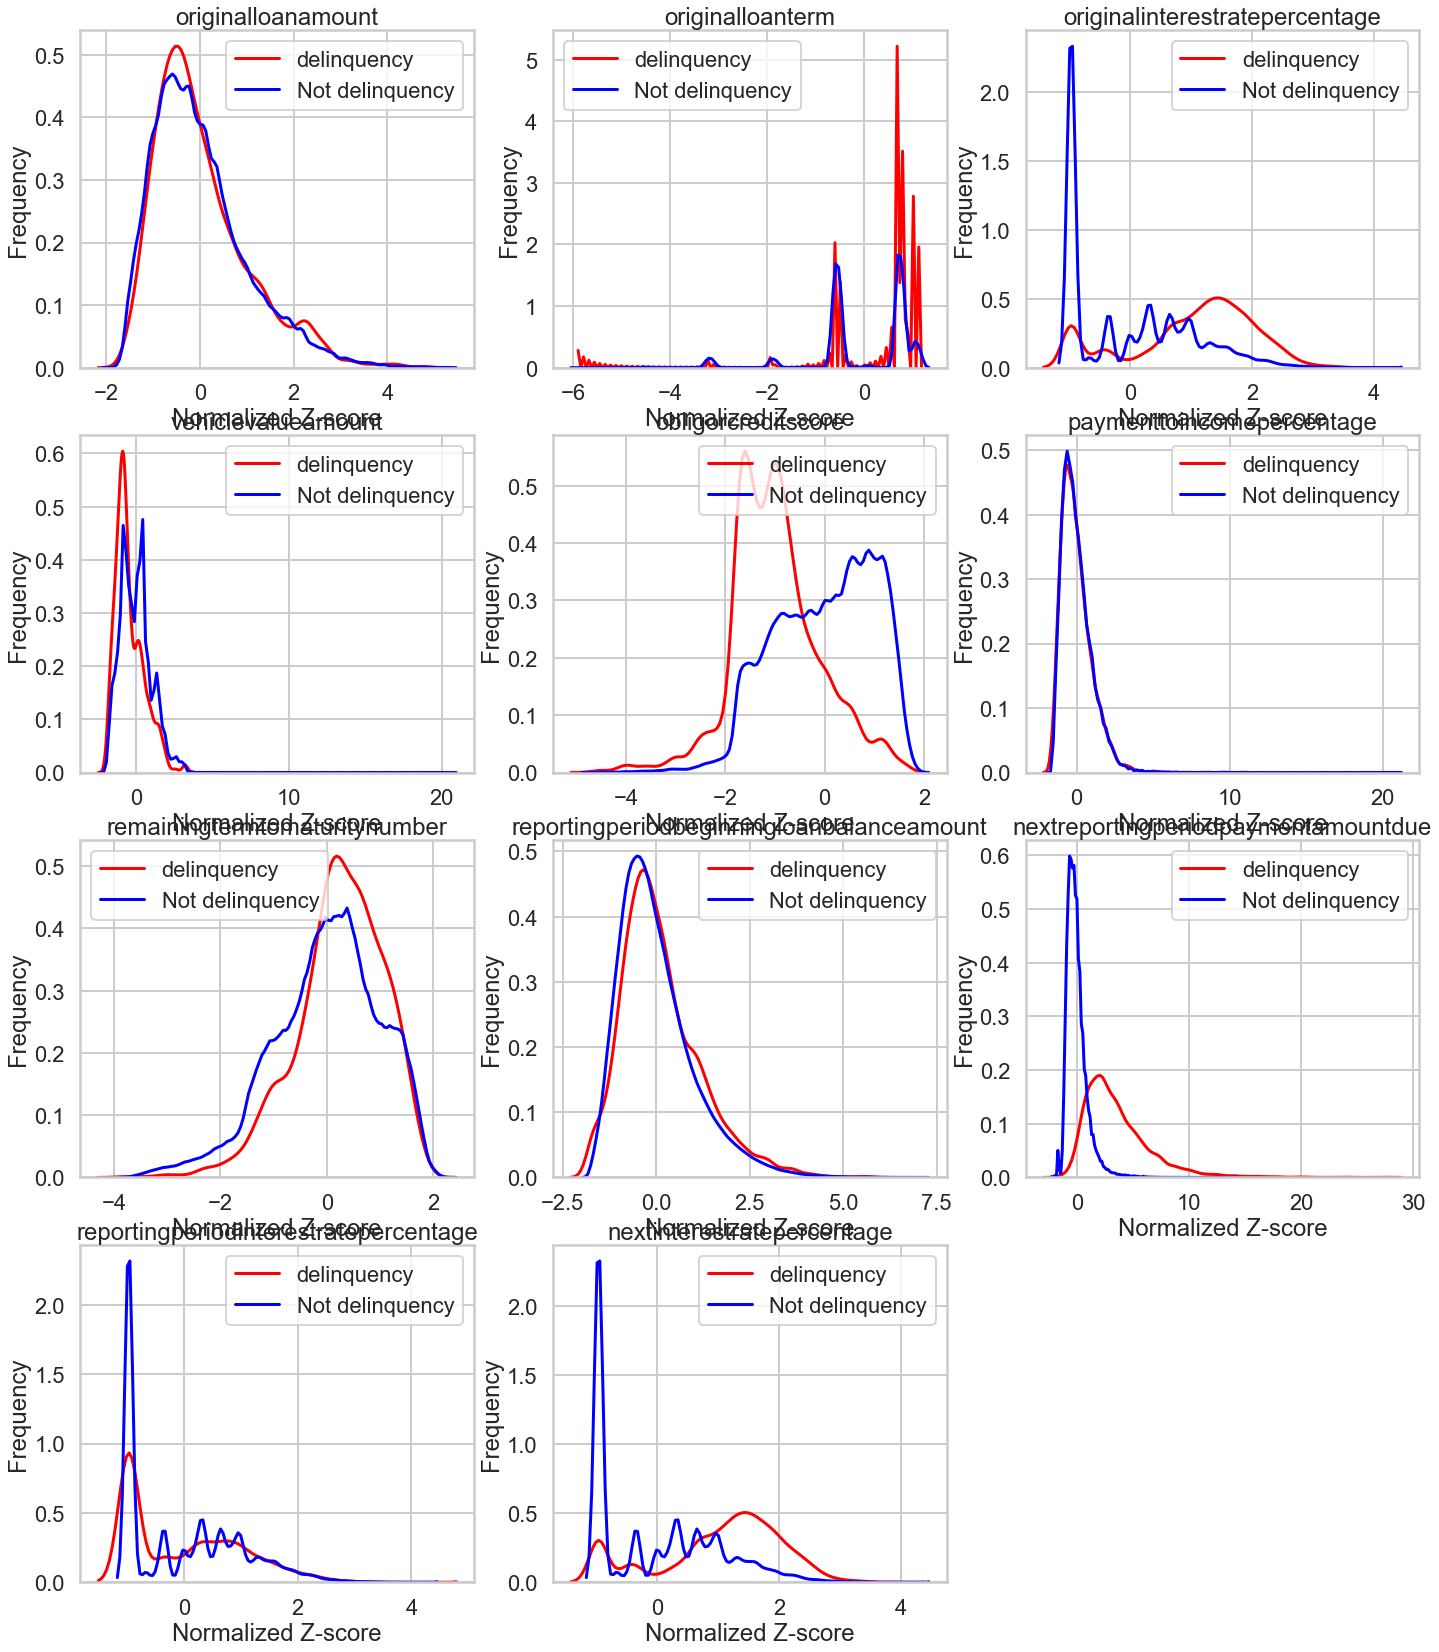

In [40]:
#0 is mean
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
fig=plt.figure(figsize=(24,36))
pos=df[df["delinquency"]==1]
neg=df[df["delinquency"]==0]
for k in range (11):
    ax=fig.add_subplot(5,3,k+1)    
    sns.kdeplot(pos[vs_part1[k]],color="red",label="delinquency")
    sns.kdeplot(neg[vs_part1[k]],color="blue",label="Not delinquency")
    ax.set_title(vs_part1[k])
    ax.set_xlabel("Normalized Z-score")
    ax.set_ylabel("Frequency")

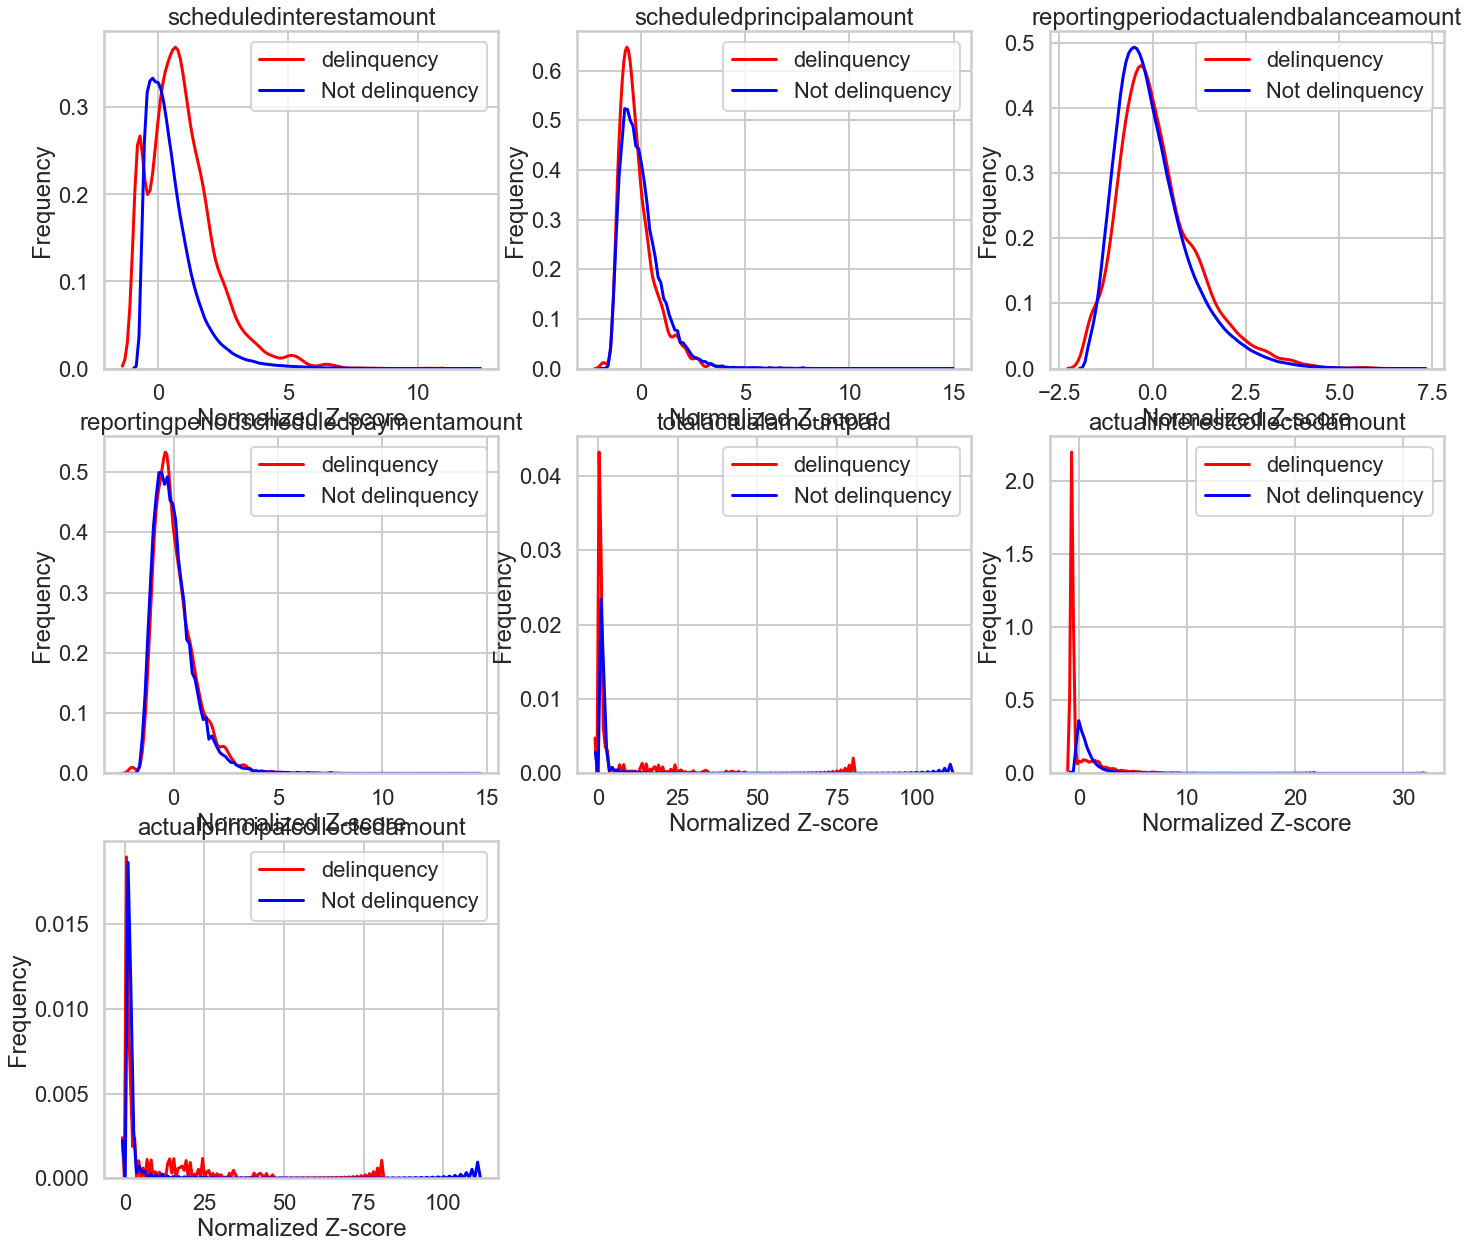

In [41]:
sns.set_style("whitegrid")
sns.set_context("poster")
fig=plt.figure(figsize=(24,36))
pos=df[df["delinquency"]==1]
neg=df[df["delinquency"]==0]
for k in range (7):
    ax=fig.add_subplot(5,3,k+1)    
    sns.kdeplot(pos[vs_part2[k]],color="red",label="delinquency")
    sns.kdeplot(neg[vs_part2[k]],color="blue",label="Not delinquency")
    ax.set_title(vs_part2[k])
    ax.set_xlabel("Normalized Z-score")
    ax.set_ylabel("Frequency")

In [42]:
pos=df[df['delinquency']==1]
neg=df[df['delinquency']==0]
percent_delinquency=float(len(pos))/len(df)
percent_non_delinquency=float(len(neg))/len(df)
print(percent_delinquency, percent_non_delinquency)

0.007208716518168035 0.992791283481832


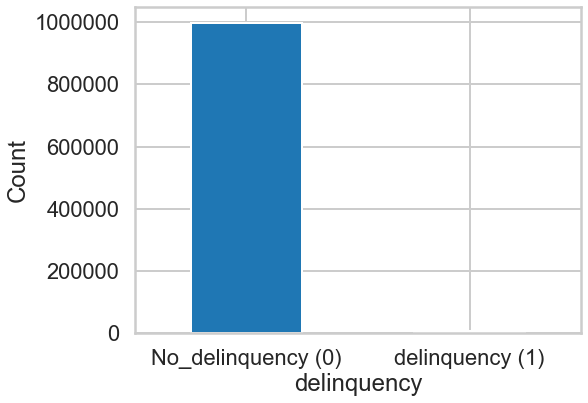

In [57]:
fig, ax = plt.subplots(figsize=(8,6))
df.groupby(['delinquency'])['delinquency'].count().plot(kind='bar')
plt.xticks([0,1],['No_delinquency (0)','delinquency (1)'], rotation=0)
plt.ylabel('Count')
plt.show()


In [58]:
mask = np.random.rand(len(df)) < 0.7

In [ ]:
mask

In [ ]:
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

In [36]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [37]:
#how many random samples from normal transactions do we need?
no_of_delinquency = train.delinquency.value_counts()[1]
print('There are {} delinquency in the train data.'.format(no_of_delinquency))

There are 5080 delinquency in the train data.


In [38]:
#randomly selecting 61613 random non-delinquency transactions
non_delinquency = train[train['delinquency'] == 0]
delinquency = train[train['delinquency'] == 1]

In [39]:
selected = non_delinquency.sample(no_of_delinquency)
selected.head()

,delinquency,originalloanamount,originalloanterm,originalinterestratepercentage,vehiclevalueamount,obligorcreditscore,paymenttoincomepercentage,remainingtermtomaturitynumber,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,...,obligorgeographiclocation_WI,obligorgeographiclocation_WV,obligorgeographiclocation_WY,assetaddedindicator_False,reportingperiodmodificationindicator_False,reportingperiodmodificationindicator_True,servicingadvancemethodcode_1,assetsubjectdemandindicator_False,repossessedindicator_False,repossessedindicator_True
390320,0,1.137784,0.697396,-0.966707,0.679151,0.655460,2.616169,-0.020639,0.769380,0.414912,...,0,0,0,1,1,0,1,1,1,0
528429,0,-0.649539,1.134344,0.205446,-1.025160,-8.550660,0.529287,0.622487,-0.514734,-0.709216,...,0,0,0,1,1,0,1,1,1,0
544391,0,-0.414334,0.806633,0.009543,-0.897495,-0.970469,-0.483739,-0.020639,-0.456532,-0.519553,...,0,0,0,1,1,0,1,1,1,0
485642,0,-0.051108,1.134344,0.274012,-0.329687,0.397554,-0.649848,-0.663765,-0.802053,-0.271721,...,0,0,0,1,1,0,1,1,1,0
261901,0,-0.109732,-0.504210,-0.966707,0.035658,-0.342524,-0.567963,-0.824546,-0.333267,-0.165823,...,0,0,0,1,1,0,1,1,1,0


In [40]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
delinquency.reset_index(drop=True, inplace=True)

In [41]:
subsample = pd.concat([selected, delinquency])
len(subsample)

10160

In [42]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,delinquency,originalloanamount,originalloanterm,originalinterestratepercentage,vehiclevalueamount,obligorcreditscore,paymenttoincomepercentage,remainingtermtomaturitynumber,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,...,obligorgeographiclocation_WI,obligorgeographiclocation_WV,obligorgeographiclocation_WY,assetaddedindicator_False,reportingperiodmodificationindicator_False,reportingperiodmodificationindicator_True,servicingadvancemethodcode_1,assetsubjectdemandindicator_False,repossessedindicator_False,repossessedindicator_True
0,0,3.606571,0.697396,-0.966707,2.417757,-0.084618,-0.635810,1.185223,4.240692,2.059901,...,0,0,0,1,1,0,1,1,1,0
1,1,1.439331,0.697396,0.662552,1.301026,0.083581,-1.012479,0.702878,1.720056,6.292801,...,0,0,0,1,1,0,1,1,1,0
2,1,-0.581180,0.697396,1.743284,-1.169256,-0.073405,-1.040553,0.300924,-0.359014,3.917424,...,0,0,0,1,1,0,1,1,0,1
3,0,0.442874,0.697396,-0.966707,0.093006,-0.107045,0.262578,-0.342202,0.033523,-0.048093,...,0,0,0,1,1,0,1,1,1,0
4,0,-0.897674,0.697396,0.336047,-1.264596,-1.531134,-1.389147,0.461706,-0.744831,-0.027634,...,0,0,0,1,1,0,1,1,1,0
5,1,0.361533,0.697396,0.763769,0.065127,-0.779843,-0.177258,1.426395,0.950357,3.825515,...,0,0,0,1,1,0,1,1,1,0
6,1,0.446504,1.134344,1.890211,-0.509585,-0.185538,1.036970,1.185223,0.963628,4.436640,...,0,0,0,1,1,0,1,1,1,0
7,0,-1.357797,-1.815054,0.956407,-0.818305,1.025498,-0.427590,-1.146109,-1.296055,-0.958041,...,0,0,0,1,1,0,1,1,1,0
8,1,-0.242440,1.025107,0.714793,-1.049430,0.935792,-0.334008,0.702878,-1.072771,2.267582,...,0,0,0,1,1,0,1,1,1,0
9,1,0.461992,1.025107,1.661657,0.204726,-0.678923,0.618190,1.104832,0.924244,3.248781,...,0,0,0,1,1,0,1,1,1,0


Text(0.5, 0, 'delinquency (0:Non-delinquency, 1:delinquency)')

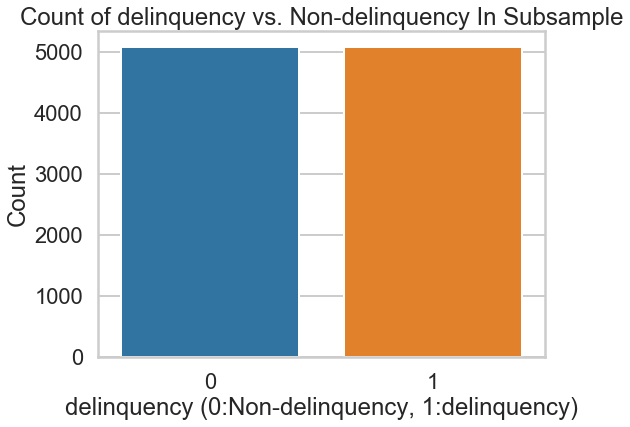

In [43]:
new_counts = subsample.delinquency.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of delinquency vs. Non-delinquency In Subsample')
plt.ylabel('Count')
plt.xlabel('delinquency (0:Non-delinquency, 1:delinquency)')

# Model

In [44]:
df.head()

,delinquency,originalloanamount,originalloanterm,originalinterestratepercentage,vehiclevalueamount,obligorcreditscore,paymenttoincomepercentage,remainingtermtomaturitynumber,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,...,obligorgeographiclocation_WI,obligorgeographiclocation_WV,obligorgeographiclocation_WY,assetaddedindicator_False,reportingperiodmodificationindicator_False,reportingperiodmodificationindicator_True,servicingadvancemethodcode_1,assetsubjectdemandindicator_False,repossessedindicator_False,repossessedindicator_True
0,0,-1.014870,0.697396,1.139250,-1.240669,-2.013306,-0.867426,-1.146109,-1.138919,-0.130666,...,0,0,0,1,1,0,1,1,1,0
1,0,-0.480743,1.025107,-0.052493,-1.035774,0.442407,-0.399516,-0.583374,-0.722820,-0.615690,...,0,0,0,1,1,0,1,1,1,0
2,0,0.538916,-0.613447,1.204551,-0.247580,0.128434,0.426347,-2.110798,-0.562655,3.100093,...,0,0,0,1,1,0,1,1,1,0
3,1,-0.547557,0.806633,2.559546,-1.220300,-1.273228,2.026602,-1.065719,-0.654011,3.570334,...,0,0,0,1,1,0,1,1,1,0
4,0,0.917960,0.806633,1.073949,0.370260,-0.813483,1.109497,-0.744156,0.349090,2.986534,...,0,0,0,1,1,0,1,1,1,0


In [45]:
X = df.drop('delinquency', axis=1)
y = df['delinquency']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [48]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)


X_shapes:
 X_train: X_validation:
 (703620, 114) (301552, 114) 

Y_shapes:
 Y_train: Y_validation:
 (703620,) (301552,)


In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [50]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression(n_jobs=8)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('XGB', XGBClassifier(n_jobs=8)))
models.append(('RF', RandomForestClassifier(n_jobs=8)))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.997915 (0.000947)
LDA: 0.992496 (0.001568)
CART: 0.962271 (0.005930)
XGB: 0.999892 (0.000055)
RF: 0.999225 (0.000881)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


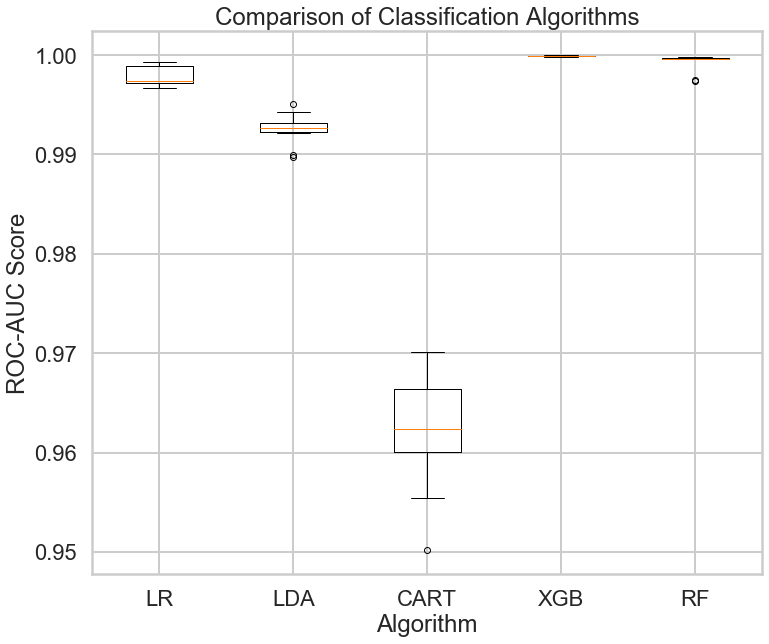

In [51]:
#Compare Algorithms
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [52]:
model = RandomForestClassifier(n_jobs=8)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=8,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [53]:
preds = model.predict(X_test)
print(pd.crosstab(y_test, preds, rownames=['Actual '], colnames=['Predicted ']))

Predicted        0     1
Actual                  
0           299361    34
1              547  1610


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    299395
           1       0.98      0.75      0.85      2157

    accuracy                           1.00    301552
   macro avg       0.99      0.87      0.92    301552
weighted avg       1.00      1.00      1.00    301552



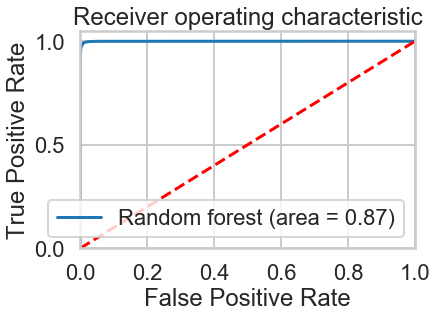

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
random_roc_auc = roc_auc_score(y_test, model.predict(X_test))
random_fpr, random_tpr, random_thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(random_fpr, random_tpr, label='Random forest (area = %0.2f)' % random_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [56]:
cart=DecisionTreeClassifier()
cart.fit(X_train, y_train)
preds = cart.predict(X_test)
print(pd.crosstab(y_test, preds, rownames=['Actual '], colnames=['Predicted ']))

Predicted        0     1
Actual                  
0           299259   136
1              178  1979


In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    299395
           1       0.94      0.92      0.93      2157

    accuracy                           1.00    301552
   macro avg       0.97      0.96      0.96    301552
weighted avg       1.00      1.00      1.00    301552



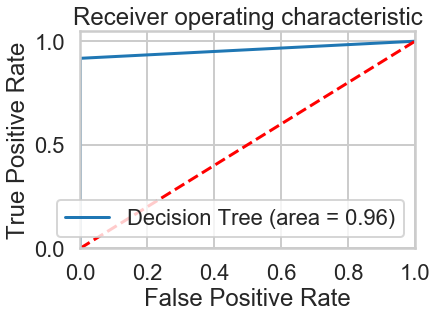

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
random_roc_auc = roc_auc_score(y_test, cart.predict(X_test))
random_fpr, random_tpr, random_thresholds = roc_curve(y_test, cart.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(random_fpr, random_tpr, label='Decision Tree (area = %0.2f)' % random_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [59]:
#df = df.loc[:,~df.columns.duplicated()]

XGB

In [60]:
xgb = XGBClassifier(n_jobs=8)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [61]:
X_test = X_test.values
preds = xgb.predict(X_test)
print(pd.crosstab(y_test, preds, rownames=['Actual '], colnames=['Predicted ']))

Predicted        0     1
Actual                  
0           299345    50
1               93  2064


undersampling

In [62]:
subsample

,delinquency,originalloanamount,originalloanterm,originalinterestratepercentage,vehiclevalueamount,obligorcreditscore,paymenttoincomepercentage,remainingtermtomaturitynumber,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,...,obligorgeographiclocation_WI,obligorgeographiclocation_WV,obligorgeographiclocation_WY,assetaddedindicator_False,reportingperiodmodificationindicator_False,reportingperiodmodificationindicator_True,servicingadvancemethodcode_1,assetsubjectdemandindicator_False,repossessedindicator_False,repossessedindicator_True
0,0,3.606571,0.697396,-0.966707,2.417757,-0.084618,-0.635810,1.185223,4.240692,2.059901,...,0,0,0,1,1,0,1,1,1,0
1,1,1.439331,0.697396,0.662552,1.301026,0.083581,-1.012479,0.702878,1.720056,6.292801,...,0,0,0,1,1,0,1,1,1,0
2,1,-0.581180,0.697396,1.743284,-1.169256,-0.073405,-1.040553,0.300924,-0.359014,3.917424,...,0,0,0,1,1,0,1,1,0,1
3,0,0.442874,0.697396,-0.966707,0.093006,-0.107045,0.262578,-0.342202,0.033523,-0.048093,...,0,0,0,1,1,0,1,1,1,0
4,0,-0.897674,0.697396,0.336047,-1.264596,-1.531134,-1.389147,0.461706,-0.744831,-0.027634,...,0,0,0,1,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10155,1,0.614400,0.697396,-0.966707,0.553960,-0.914403,-0.670904,1.426395,1.241219,3.338732,...,0,0,0,1,1,0,1,1,1,0
10156,0,-0.178612,-0.504210,-0.966707,-0.288892,0.128434,0.402951,-0.985328,-0.461795,-0.220900,...,0,0,0,1,1,0,1,1,1,0
10157,0,-0.444948,0.697396,0.306662,-0.683146,-0.207965,-0.252124,0.863660,-0.192797,-0.512885,...,0,0,0,1,1,0,1,1,1,0
10158,1,0.000701,0.697396,1.152310,-0.881088,0.879726,-0.256803,0.702878,0.271219,3.875712,...,0,0,0,1,1,0,1,1,1,0


In [63]:
X = subsample.iloc[:, subsample.columns != 'delinquency']
y = subsample.iloc[:, subsample.columns == 'delinquency']

In [64]:
y.head()

,delinquency
0,0
1,1
2,1
3,0
4,0


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [66]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs=8)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print(pd.crosstab(y_test.values.flatten(), preds, rownames=['Actual '], colnames=['Predicted ']))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Predicted      0     1
Actual                
0           1500    49
1             13  1486


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1549
           1       0.97      0.99      0.98      1499

    accuracy                           0.98      3048
   macro avg       0.98      0.98      0.98      3048
weighted avg       0.98      0.98      0.98      3048



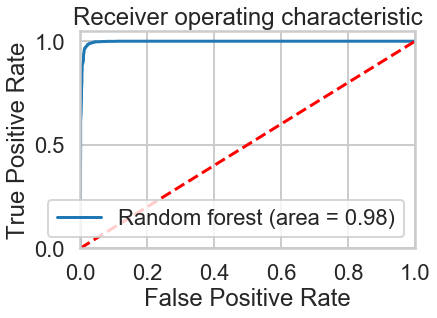

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
random_roc_auc = roc_auc_score(y_test, model.predict(X_test))
random_fpr, random_tpr, random_thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(random_fpr, random_tpr, label='Random forest (area = %0.2f)' % random_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
X = df.drop('delinquency', axis=1)
y = df['delinquency']

preds = model.predict(X)
print(pd.crosstab(y, preds, rownames=['Actual '], colnames=['Predicted ']))

Predicted        0      1
Actual                   
0           964966  32960
1               22   7224


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y, preds))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98    997926
           1       0.18      1.00      0.30      7246

    accuracy                           0.97   1005172
   macro avg       0.59      0.98      0.64   1005172
weighted avg       0.99      0.97      0.98   1005172



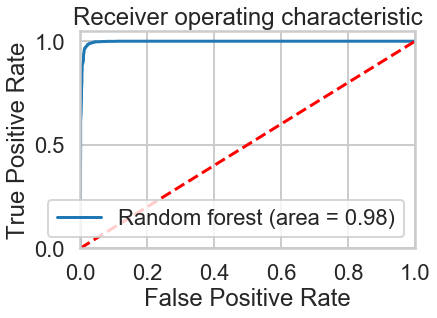

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
random_roc_auc = roc_auc_score(y_test, model.predict(X_test))
random_fpr, random_tpr, random_thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(random_fpr, random_tpr, label='Random forest (area = %0.2f)' % random_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [72]:
list(zip(X_test, model.feature_importances_))

[('originalloanamount', 0.014505076673538895),
 ('originalloanterm', 0.01106212665178178),
 ('originalinterestratepercentage', 0.03337611874474562),
 ('vehiclevalueamount', 0.01914852250542819),
 ('obligorcreditscore', 0.03976715733652925),
 ('paymenttoincomepercentage', 0.006607939161138968),
 ('remainingtermtomaturitynumber', 0.009428820649569172),
 ('reportingperiodbeginningloanbalanceamount', 0.01105746600155306),
 ('nextreportingperiodpaymentamountdue', 0.2463596590441181),
 ('reportingperiodinterestratepercentage', 0.0040170343036115014),
 ('nextinterestratepercentage', 0.03209757662566386),
 ('servicingfeepercentage', 0.0),
 ('servicingflatfeeamount', 0.0),
 ('otherservicerfeeretainedbyservicer', 0.0),
 ('otherassesseduncollectedservicerfeeamount', 0.21825611779357904),
 ('scheduledinterestamount', 0.0266702791969498),
 ('scheduledprincipalamount', 0.01292094628331946),
 ('otherprincipaladjustmentamount', 0.00026846902620741153),
 ('reportingperiodactualendbalanceamount', 0.0118

In [ ]:
list(zip(X_test, model.feature_importances_).sort(key = lambda t: t[1]))

over_sampling

In [73]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(n_jobs=8)
X_res, y_res = smote.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Using TensorFlow backend.


Resampled dataset shape Counter({0: 997926, 1: 997926})


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size = 0.3, random_state=0)

In [75]:
model = RandomForestClassifier(n_jobs=8)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print(pd.crosstab(y_test.values.flatten(), preds, rownames=['Actual '], colnames=['Predicted ']))

Predicted        0       1
Actual                    
0           299377     220
1               29  299130


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    299597
           1       1.00      1.00      1.00    299159

    accuracy                           1.00    598756
   macro avg       1.00      1.00      1.00    598756
weighted avg       1.00      1.00      1.00    598756



ANN

In [35]:
df.head()

,delinquency,originalloanamount,originalloanterm,originalinterestratepercentage,vehiclevalueamount,obligorcreditscore,paymenttoincomepercentage,remainingtermtomaturitynumber,reportingperiodbeginningloanbalanceamount,nextreportingperiodpaymentamountdue,...,obligorgeographiclocation_WI,obligorgeographiclocation_WV,obligorgeographiclocation_WY,assetaddedindicator_False,reportingperiodmodificationindicator_False,reportingperiodmodificationindicator_True,servicingadvancemethodcode_1,assetsubjectdemandindicator_False,repossessedindicator_False,repossessedindicator_True
0,0,-1.014870,0.697396,1.139250,-1.240669,-2.608501,-0.867426,-1.146109,-1.138919,-0.130666,...,0,0,0,1,1,0,1,1,1,0
1,0,-0.480743,1.025107,-0.052493,-1.035774,0.504866,-0.399515,-0.583374,-0.722820,-0.615690,...,0,0,0,1,1,0,1,1,1,0
2,0,0.538916,-0.613447,1.204551,-0.247580,0.106810,0.426347,-2.110798,-0.562655,3.100093,...,0,0,0,1,1,0,1,1,1,0
3,1,-0.547557,0.806633,2.559546,-1.220300,-1.670226,2.026602,-1.065719,-0.654011,3.570334,...,0,0,0,1,1,0,1,1,1,0
4,0,0.917960,0.806633,1.073949,0.370260,-1.087358,1.109497,-0.744156,0.349090,2.986534,...,0,0,0,1,1,0,1,1,1,0


In [36]:
X = df.drop('delinquency', axis=1)
y = df['delinquency']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

use sigmoid and binary crossentropy

In [37]:
import keras
from keras.models import Sequential
from keras.layers import Dense
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units =60 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 104))
# Adding the second hidden layer
classifier.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 32, epochs = 10)

Using TensorFlow backend.


Epoch 1/10
703620/703620 [==============================] - 20s 29us/step - loss: 0.0055 - accuracy: 0.9988
Epoch 2/10
703620/703620 [==============================] - 20s 28us/step - loss: 0.0033 - accuracy: 0.9993
Epoch 3/10
703620/703620 [==============================] - 20s 28us/step - loss: 0.0027 - accuracy: 0.9993
Epoch 4/10
703620/703620 [==============================] - 20s 28us/step - loss: 0.0025 - accuracy: 0.9994
Epoch 5/10
703620/703620 [==============================] - 20s 28us/step - loss: 0.0023 - accuracy: 0.9995
Epoch 6/10
703620/703620 [==============================] - 20s 28us/step - loss: 0.0022 - accuracy: 0.9995
Epoch 7/10
703620/703620 [==============================] - 20s 28us/step - loss: 0.0021 - accuracy: 0.9995
Epoch 8/10
703620/703620 [==============================] - 20s 28us/step - loss: 0.0020 - accuracy: 0.9995
Epoch 9/10
703620/703620 [==============================] - 20s 28us/step - loss: 0.0020 - accuracy: 0.9995
Epoch 10/10
703620/703620 [=

In [38]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
score = classifier.evaluate(X_test, y_test)
score

301552/301552 [==============================] - 3s 9us/step


[0.002606188268645259, 0.999638557434082]

In [39]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    299395
           1       0.98      0.97      0.97      2157

    accuracy                           1.00    301552
   macro avg       0.99      0.99      0.99    301552
weighted avg       1.00      1.00      1.00    301552



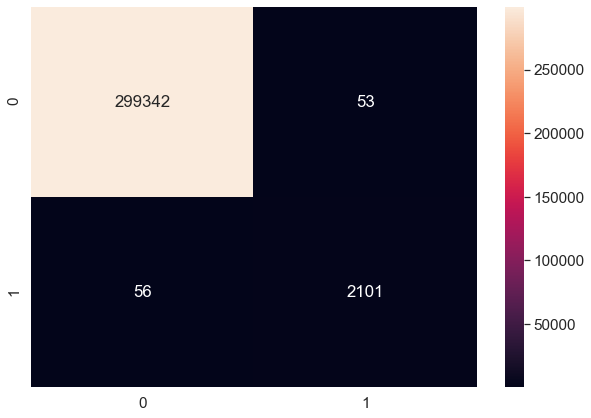

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

use Softmax and sparse categorical crossentropy

In [44]:
classifier2 = Sequential()
# Adding the input layer and the first hidden layer
classifier2.add(Dense(units =60 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 104))
# Adding the second hidden layer
classifier2.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier2.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'softmax'))
# Compiling the ANN
classifier2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['binary_accuracy'])
# Fitting the ANN to the Training set
classifier2.fit(X_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
703620/703620 [==============================] - 19s 27us/step - loss: 0.0055 - binary_accuracy: 0.5000
Epoch 2/10
703620/703620 [==============================] - 19s 27us/step - loss: 0.0031 - binary_accuracy: 0.5000
Epoch 3/10
703620/703620 [==============================] - 19s 27us/step - loss: 0.0026 - binary_accuracy: 0.5000
Epoch 4/10
703620/703620 [==============================] - 19s 28us/step - loss: 0.0025 - binary_accuracy: 0.5000
Epoch 5/10
703620/703620 [==============================] - 19s 27us/step - loss: 0.0024 - binary_accuracy: 0.5000
Epoch 6/10
703620/703620 [==============================] - 19s 27us/step - loss: 0.0023 - binary_accuracy: 0.5000
Epoch 7/10
703620/703620 [==============================] - 19s 27us/step - loss: 0.0021 - binary_accuracy: 0.5000
Epoch 8/10
703620/703620 [==============================] - 19s 27us/step - loss: 0.0021 - binary_accuracy: 0.5000
Epoch 9/10
703620/703620 [==============================] - 19s 27us/step - loss

In [45]:
y_pred = classifier2.predict(X_test)
y_pred = (y_pred > 0.5)
score = classifier.evaluate(X_test, y_test)
score

301552/301552 [==============================] - 3s 9us/step


[0.002606188268645259, 0.999638557434082]

In [46]:
y_pred

array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [ True, False],
       [ True, False],
       [ True, False]])

In [47]:
def apl(ary):
    res=[]
    for i in range(0,len(ary)):
        res.append(ary[i][1])
    return res
y_pred=apl(y_pred)

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    299395
           1       0.96      0.95      0.96      2157

    accuracy                           1.00    301552
   macro avg       0.98      0.98      0.98    301552
weighted avg       1.00      1.00      1.00    301552



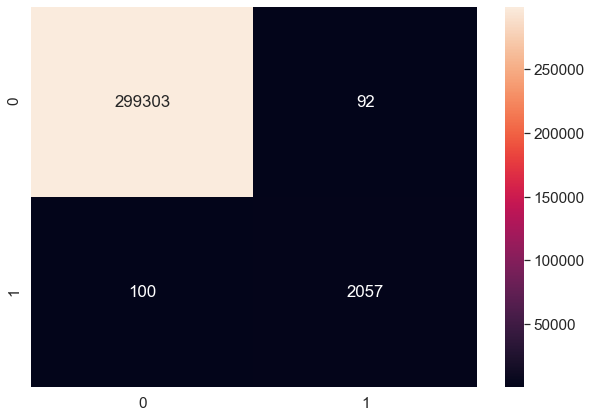

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')